### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [2]:
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, ParameterGrid
from sklearn.feature_selection import RFECV
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV

from sklearn import (
    ensemble, 
    gaussian_process,
    linear_model,
    naive_bayes,
    tree, 
    discriminant_analysis
)

from sklearn.ensemble import StackingClassifier, VotingClassifier

### Import the Train data set and Test data set 

In [3]:
loc_train = 'data\\train.csv'
loc_test = 'data\\test.csv'
loc_val = 'data\\val.csv'

target = 'Survived'
evaluation = 'accuracy'
Id = 'PassengerId'

raw_train_data = pd.read_csv(loc_train)
y = raw_train_data[target]
raw_train_data = raw_train_data.drop(target, axis=1)

raw_val_data = pd.read_csv(loc_val)
v = raw_val_data[target]
raw_val_data = raw_val_data.drop(target, axis=1)

raw_test_data = pd.read_csv(loc_test)
raw_train_data.head(5)

,Pclass,Age,SibSp,Parch,Fare,hasCabin,Sex_male,Cabin_A,Cabin_B,Cabin_C,...,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,PassengerId
0,0.891908,-0.517115,1.344582,-0.553061,-0.994604,-0.539377,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,-1.388945,0.601072,1.344582,-0.553061,1.536208,1.853992,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,0.891908,-0.209352,-0.680702,-0.553061,-0.924307,-0.539377,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
3,-1.388945,0.412967,1.344582,-0.553061,1.299924,1.853992,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4
4,0.891908,0.412967,-0.680702,-0.553061,-0.911455,-0.539377,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5


In [4]:
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_iris
# R, t = load_iris(True, True)
# raw_train_data, raw_test_data, y, v = train_test_split(R, t, random_state=47)
# raw_train_data.head(5)

In [5]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        806 non-null    float64
 1   Age           806 non-null    float64
 2   SibSp         806 non-null    float64
 3   Parch         806 non-null    float64
 4   Fare          806 non-null    float64
 5   hasCabin      806 non-null    float64
 6   Sex_male      806 non-null    float64
 7   Cabin_A       806 non-null    float64
 8   Cabin_B       806 non-null    float64
 9   Cabin_C       806 non-null    float64
 10  Cabin_D       806 non-null    float64
 11  Cabin_E       806 non-null    float64
 12  Cabin_F       806 non-null    float64
 13  Cabin_G       806 non-null    float64
 14  Cabin_T       806 non-null    float64
 15  Embarked_C    806 non-null    float64
 16  Embarked_Q    806 non-null    float64
 17  Embarked_S    806 non-null    float64
 18  Title_Master  806 non-null    

In [6]:
raw_train_data.describe()

,Pclass,Age,SibSp,Parch,Fare,hasCabin,Sex_male,Cabin_A,Cabin_B,Cabin_C,...,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,PassengerId
count,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,...,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000
mean,0.016056,-0.035170,-0.000396,0.017304,-0.005260,0.015909,0.638958,0.017370,0.052109,0.066998,...,0.001241,0.187345,0.088089,0.722084,0.044665,0.029777,0.210918,0.573201,0.141439,448.475186
std,1.000394,0.999145,1.007650,1.011078,1.002641,1.010905,0.480601,0.130726,0.222385,0.250173,...,0.035223,0.390430,0.283601,0.448250,0.206696,0.170076,0.408214,0.494920,0.348690,257.236641
min,-1.388945,-2.395284,-0.680702,-0.553061,-1.850076,-0.539377,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-0.663297,-0.677208,-0.680702,-0.553061,-0.926564,-0.539377,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,227.250000
50%,0.891908,0.000069,-0.680702,-0.553061,-0.318988,-0.539377,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,450.500000
75%,0.891908,0.539213,1.344582,-0.553061,0.708182,-0.539377,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,670.750000
max,0.891908,2.774180,1.952901,1.949359,2.087404,1.853992,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,891.000000


### Prepare the data for Machine Learning

In [7]:
def prepare(raw_DF):
    DF = raw_DF.copy()
    
    if Id in DF.columns:
        DF.drop(Id, axis= 1, inplace= True)
    
    return DF

In [8]:
train_X = prepare(raw_train_data)
test_X = prepare(raw_test_data)
val_X = prepare(raw_val_data)

F = train_X.copy()
F['y'] = y
F.head()

,Pclass,Age,SibSp,Parch,Fare,hasCabin,Sex_male,Cabin_A,Cabin_B,Cabin_C,...,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,y
0,0.891908,-0.517115,1.344582,-0.553061,-0.994604,-0.539377,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,-1.388945,0.601072,1.344582,-0.553061,1.536208,1.853992,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.891908,-0.209352,-0.680702,-0.553061,-0.924307,-0.539377,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,-1.388945,0.412967,1.344582,-0.553061,1.299924,1.853992,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,0.891908,0.412967,-0.680702,-0.553061,-0.911455,-0.539377,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [9]:
F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        806 non-null    float64
 1   Age           806 non-null    float64
 2   SibSp         806 non-null    float64
 3   Parch         806 non-null    float64
 4   Fare          806 non-null    float64
 5   hasCabin      806 non-null    float64
 6   Sex_male      806 non-null    float64
 7   Cabin_A       806 non-null    float64
 8   Cabin_B       806 non-null    float64
 9   Cabin_C       806 non-null    float64
 10  Cabin_D       806 non-null    float64
 11  Cabin_E       806 non-null    float64
 12  Cabin_F       806 non-null    float64
 13  Cabin_G       806 non-null    float64
 14  Cabin_T       806 non-null    float64
 15  Embarked_C    806 non-null    float64
 16  Embarked_Q    806 non-null    float64
 17  Embarked_S    806 non-null    float64
 18  Title_Master  806 non-null    

### Visualize

In [10]:
F.corr().abs().sort_values('y', ascending=False).y

y               1.000000
Sex_male        0.576254
Title_Mr        0.576131
Pclass          0.360900
Title_Miss      0.357251
Fare            0.353048
Title_Mrs       0.344982
hasCabin        0.329226
Cabin_D         0.166845
Cabin_B         0.166185
Cabin_E         0.156545
Embarked_C      0.155004
Embarked_S      0.148510
Parch           0.143531
Cabin_C         0.130399
SibSp           0.105408
Age             0.090325
Title_Master    0.060109
Cabin_F         0.058569
Title_Misc      0.038733
Cabin_T         0.028304
Cabin_G         0.015614
Embarked_Q      0.010435
Cabin_A         0.009943
Name: y, dtype: float64

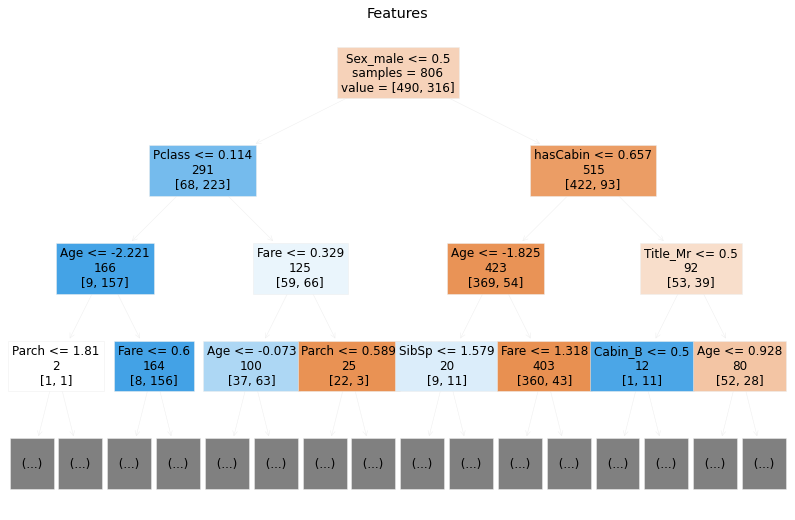

In [11]:
dt = DecisionTreeClassifier().fit(train_X, y)
plt.figure(figsize = (14, 9))
plot_tree(dt, 
          max_depth = 3, 
          filled = True, 
          fontsize=12, 
          label='root', 
          impurity=False, 
          feature_names=train_X.columns
         )
plt.title('Features')
plt.show()

### List of Classifiers
https://scikit-learn.org/stable/supervised_learning.html

In [12]:
# https://scikit-learn.org/stable/supervised_learning.html

Classifiers_small = [
    MLPClassifier(), 
    KNeighborsClassifier(), 
    SVC(class_weight='balanced'), 
    SGDClassifier(class_weight='balanced'), 
    RandomForestClassifier(class_weight='balanced')
]

Classifiers_medium = [
    LinearSVC(class_weight='balanced'),
    GaussianProcessClassifier(), 
    DecisionTreeClassifier(class_weight='balanced'), 
    AdaBoostClassifier(), 
    GaussianNB(), 
    QuadraticDiscriminantAnalysis(), 
    GradientBoostingClassifier(), 
]

Classifiers_large = [    
    linear_model.LogisticRegressionCV(), 
    linear_model.PassiveAggressiveClassifier(), 
    linear_model.RidgeClassifierCV(), 
    linear_model.Perceptron(), 
    
    NuSVC(class_weight='balanced'), 
    LinearDiscriminantAnalysis(),
    
    naive_bayes.MultinomialNB(), 
    naive_bayes.ComplementNB(), 
    naive_bayes.BernoulliNB(), 
    naive_bayes.CategoricalNB(), 
    
    ensemble.ExtraTreesClassifier(class_weight='balanced'),
]

### Tips on Practical Use of some classifiers

https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use

https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use

https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use

https://scikit-learn.org/stable/modules/neural_networks_supervised.html#tips-on-practical-use


### Parameter Grid

In [13]:
# parameter tuning
mlpc_parameters = {
    'activation': ['relu', 'logistic'], 
    'alpha': 10.0 ** -np.arange(1, 7),
}

knn_parameters = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance']
}

svc_parameters = {
    'class_weight': ['balanced', None],
    'gamma': ['scale', 'auto']    
}

sgd_parameters = {
    'alpha': 10.0**-np.arange(1,7),
    'class_weight': [None, 'balanced'],
}

rf_parameters = {
    'n_estimators': [500], 
    'class_weight': ['balanced', None]
}

### Making the list of Classifiers

In [14]:
mlpc_models = [MLPClassifier(**params) for params in ParameterGrid(mlpc_parameters)]
knn_models = [KNeighborsClassifier(**params) for params in ParameterGrid(knn_parameters)]
svc_models = [SVC(**params) for params in ParameterGrid(svc_parameters)]
sgd_models = [SGDClassifier(**params) for params in ParameterGrid(sgd_parameters)]
rf_models = [RandomForestClassifier(**params) for params in ParameterGrid(rf_parameters)]

In [15]:
MLA = Classifiers_small
MLA = mlpc_models + knn_models + svc_models + sgd_models + rf_models
MLA = MLA + Classifiers_medium
MLA = MLA + Classifiers_large

### Checking the accuracy of each of the Classifiers
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [16]:
paramlist = ['activation', 'alpha', 'class_weight', 'n_neighbours', 'weights', 'gamma', 'n_estimators',
            'final_estimator']
scoring_metrics = [evaluation]
metrics = ['fit_time'] +  ['test_'+m for m in scoring_metrics]

scorer = sklearn.metrics.get_scorer(evaluation)


def cv(alg, X, y):
    name = alg.__class__.__name__
#     params = alg.get_params()
#     imp_params = {p: params[p] for p in params if p in paramlist}
    
    score = pd.DataFrame(cross_validate(alg, X, y, scoring=scoring_metrics))
    
    df = pd.DataFrame({
        name: [alg] + 
        #[imp_params] + 
        [score[i].mean() for i in metrics] + [score['test_'+evaluation].std()] + 
        
        [scorer(clone(alg).fit(train_X, y), val_X, v)]
    })
    
    return df.transpose()

def CVscoreDF(MLA, X, y):
    M = pd.DataFrame()
    for alg in MLA:
        try:
            M = M.append(cv(alg, X, y))
        except:
            continue

    M = M.rename(columns={i: c for i, c in enumerate(['models']+metrics+['std_test_score', 'val_score'])})
    M = M.sort_values('test_'+evaluation, ascending = False)
    return M

In [17]:
Score = CVscoreDF(MLA, train_X, y)
Score.head(10)

,models,fit_time,test_accuracy,std_test_score,val_score
MLPClassifier,MLPClassifier(alpha=1e-06),1.32345,0.84742,0.0267241,0.741176
GradientBoostingClassifier,GradientBoostingClassifier(),0.0998155,0.842435,0.017299,0.705882
MLPClassifier,MLPClassifier(alpha=0.01),1.33289,0.841224,0.0280533,0.729412
MLPClassifier,MLPClassifier(alpha=0.1),1.31474,0.841208,0.0264239,0.729412
MLPClassifier,MLPClassifier(),1.32092,0.841208,0.033505,0.705882
MLPClassifier,MLPClassifier(alpha=1e-05),1.32285,0.841208,0.0298515,0.705882
MLPClassifier,MLPClassifier(alpha=0.001),1.34179,0.838739,0.0285556,0.705882
GaussianProcessClassifier,GaussianProcessClassifier(),0.271202,0.837489,0.0157815,0.658824
MLPClassifier,"MLPClassifier(activation='logistic', alpha=0.01)",0.98212,0.837489,0.0227839,0.670588
MLPClassifier,MLPClassifier(activation='logistic'),1.0021,0.836255,0.027055,0.670588


### Stack Ensembling
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

https://scikit-learn.org/stable/modules/linear_model.html

In [18]:
# List of the Classifiers to be stacked

MLA = Score.models.head(32).to_list()
Stack_estimators = [
    (a.__class__.__name__ + str(i), a) for i, a in enumerate(MLA)
]
Stack_estimators[:5]

[('MLPClassifier0', MLPClassifier(alpha=1e-06)),
 ('GradientBoostingClassifier1', GradientBoostingClassifier()),
 ('MLPClassifier2', MLPClassifier(alpha=0.01)),
 ('MLPClassifier3', MLPClassifier(alpha=0.1)),
 ('MLPClassifier4', MLPClassifier())]

In [19]:
LRstack = StackingClassifier(Stack_estimators, final_estimator=LogisticRegressionCV())
LRstack.fit(train_X, y)

StackingClassifier(estimators=[('MLPClassifier0', MLPClassifier(alpha=1e-06)),
                               ('GradientBoostingClassifier1',
                                GradientBoostingClassifier()),
                               ('MLPClassifier2', MLPClassifier(alpha=0.01)),
                               ('MLPClassifier3', MLPClassifier(alpha=0.1)),
                               ('MLPClassifier4', MLPClassifier()),
                               ('MLPClassifier5', MLPClassifier(alpha=1e-05)),
                               ('MLPClassifier6', MLPClassifier(alpha=0.00...
                                KNeighborsClassifier(n_neighbors=15,
                                                     weights='distance')),
                               ('KNeighborsClassifier27',
                                KNeighborsClassifier(n_neighbors=16,
                                                     weights='distance')),
                               ('KNeighborsClassifier28',
           

In [20]:
LSstack = StackingClassifier(Stack_estimators, final_estimator=LinearSVC())
LSstack.fit(train_X, y)

StackingClassifier(estimators=[('MLPClassifier0', MLPClassifier(alpha=1e-06)),
                               ('GradientBoostingClassifier1',
                                GradientBoostingClassifier()),
                               ('MLPClassifier2', MLPClassifier(alpha=0.01)),
                               ('MLPClassifier3', MLPClassifier(alpha=0.1)),
                               ('MLPClassifier4', MLPClassifier()),
                               ('MLPClassifier5', MLPClassifier(alpha=1e-05)),
                               ('MLPClassifier6', MLPClassifier(alpha=0.00...
                               ('KNeighborsClassifier26',
                                KNeighborsClassifier(n_neighbors=15,
                                                     weights='distance')),
                               ('KNeighborsClassifier27',
                                KNeighborsClassifier(n_neighbors=16,
                                                     weights='distance')),
           

In [21]:
Vstack = VotingClassifier(Stack_estimators)
Vstack.fit(train_X, y)

VotingClassifier(estimators=[('MLPClassifier0', MLPClassifier(alpha=1e-06)),
                             ('GradientBoostingClassifier1',
                              GradientBoostingClassifier()),
                             ('MLPClassifier2', MLPClassifier(alpha=0.01)),
                             ('MLPClassifier3', MLPClassifier(alpha=0.1)),
                             ('MLPClassifier4', MLPClassifier()),
                             ('MLPClassifier5', MLPClassifier(alpha=1e-05)),
                             ('MLPClassifier6', MLPClassifier(alpha=0.001)...
                                                   weights='distance')),
                             ('KNeighborsClassifier26',
                              KNeighborsClassifier(n_neighbors=15,
                                                   weights='distance')),
                             ('KNeighborsClassifier27',
                              KNeighborsClassifier(n_neighbors=16,
                                     

## Own Stack Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [22]:
TrainedMLA  = list(Stack_estimators)
for n, alg in TrainedMLA:
    alg.fit(train_X, y)

In [23]:
def level1(X):
    L1 = pd.DataFrame({'temp':X.index})
    for name, alg in TrainedMLA:
        L1[name] = alg.predict(X)

    return L1.drop(columns = ['temp'])
L1 = level1(train_X)

In [24]:
FLSstack = RFECV(LinearSVC())
FLRstack = RFECV(linear_model.LogisticRegression())

In [25]:
FLSstack.fit(L1, y)
FLRstack.fit(L1, y)
print ('RFECV num Features:',FLSstack.n_features_, 
       ' Linear SVC mean accuracy:', FLSstack.grid_scores_.mean())
print ('RFECV num Features:',FLSstack.n_features_, 
       '\n\tLogistic Reg mean accuracy:', FLRstack.grid_scores_.mean())

RFECV num Features: 1  Linear SVC mean accuracy: 0.9752947435012653
RFECV num Features: 1 
	Logistic Reg mean accuracy: 0.9769246990261484


### If still unsatisfied:
https://mlens.readthedocs.io/en/0.1.x/source/mlens.ensemble/

### Choose your Classifier and Predict on the test data set

In [26]:
single_classifier = Score.models.iloc[0]
single_classifier.fit(train_X, y)

MLPClassifier(alpha=1e-06)

In [27]:
predictions_single = single_classifier.predict(val_X)
predictions_SVCstack = LSstack.predict(val_X)
predictions_LRstack = LRstack.predict(val_X)
predictions_vstack = Vstack.predict(val_X)
predictions_flsstack = FLSstack.predict(level1(val_X))

In [28]:
print ('Single: ', sklearn.metrics.accuracy_score(v, predictions_single))
print ('SVC Stack: ', sklearn.metrics.accuracy_score(v, predictions_SVCstack))
print ('LR Stack: ', sklearn.metrics.accuracy_score(v, predictions_LRstack))
print ('Vote Ensemble: ', sklearn.metrics.accuracy_score(v, predictions_vstack))
print ('Own RFE Stack: ', sklearn.metrics.accuracy_score(v, predictions_flsstack))

Single:  0.6941176470588235
SVC Stack:  0.6705882352941176
LR Stack:  0.7058823529411765
Vote Ensemble:  0.6588235294117647
Own RFE Stack:  0.6470588235294118


In [29]:
# for name, predictions in [['single', predictions_single],
#                     ['svcstack', predictions_SVCstack],
#                     ['lrstack', predictions_LRstack],
#                     ['vstack', predictions_vstack],
#                     ['flsstack', predictions_flsstack]]:
#     output = pd.DataFrame({'PassengerID': raw_test_data.PassengerId, target: predictions})
#     output.to_csv(f'preds\\{name}_1.csv', index = False)

In [69]:
Score.sort_values('val_score', ascending=False).head(20)

,models,fit_time,test_accuracy,std_test_score,val_score
MLPClassifier,MLPClassifier(alpha=1e-06),1.32345,0.84742,0.0267241,0.741176
SGDClassifier,SGDClassifier(),0.00479565,0.734499,0.0567743,0.741176
MLPClassifier,MLPClassifier(alpha=0.01),1.33289,0.841224,0.0280533,0.729412
MLPClassifier,MLPClassifier(alpha=0.1),1.31474,0.841208,0.0264239,0.729412
KNeighborsClassifier,"KNeighborsClassifier(n_neighbors=4, weights='d...",0.00418534,0.794042,0.0330004,0.717647
SGDClassifier,"SGDClassifier(alpha=0.01, class_weight='balanc...",0.00380015,0.789104,0.0207567,0.705882
SVC,SVC(class_weight='balanced'),0.0148,0.828801,0.0285205,0.705882
GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.0998155,0.842435,0.017299,0.705882
MLPClassifier,MLPClassifier(alpha=0.001),1.34179,0.838739,0.0285556,0.705882
MLPClassifier,MLPClassifier(alpha=1e-05),1.32285,0.841208,0.0298515,0.705882


In [104]:
recruit_model = SGDClassifier()

In [105]:
recruit_model.fit(train_X, y)
scorer(recruit_model, val_X, v)

0.7529411764705882

In [106]:
predictions = recruit_model.predict(test_X)

In [107]:
output = pd.DataFrame({'PassengerID': raw_test_data.PassengerId, target: predictions})
output.to_csv(f'preds\\sgd_1.csv', index = False)

In [108]:
scorer(recruit_model, train_X, y)

0.7791563275434243

In [119]:
from sklearn.neighbors import KNeighborsClassifier
aval_model = KNeighborsClassifier(n_neighbors=3)

ZD = pd.concat([train_X, val_X, test_X])
it = np.array([0]*raw_train_data.shape[0] + [0]*raw_val_data.shape[0] + [1]*raw_test_data.shape[0])
aval_model.fit(ZD, it)
ip = aval_model.predict(ZD)
sklearn.metrics.accuracy_score(it, ip)

0.774637127578304

In [122]:
aval_model.predict_proba(train_X)[:, 1]>0.2

array([ True,  True, False, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,  True,  True, False,  True, False, False, False,
        True, False,  True, False, False,  True, False,  True, False,
        True,  True, False,  True, False,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True,  True, False, False, False, False,  True,
        True, False,